In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading Data to compare
df_new_MVC = pd.read_csv('C:/Users/firas/Downloads/5362627/AB194/AB194/MVC/AB194_MVC.csv')
df_new_RAW = pd.read_csv('C:/Users/firas/Downloads/5362627/AB194/AB194/Raw/AB194_Circuit_001_raw.csv')
df_old_RAW_left = pd.read_csv("C:/Users/firas/OneDrive/Bureau/Thesis/Esteban Datasets/Prestudy/Redona/2021-12-15/Trial left leg_1/Trial left leg_1.csv", sep=";", skiprows=5, decimal=",")
df_old_RAW_right = pd.read_csv("C:/Users/firas/OneDrive/Bureau/Thesis/Esteban Datasets/Prestudy/Redona/2021-12-15/Trial right leg_1/Trial right leg_1.csv", sep=";", skiprows=5, decimal=",")

# 1st Part: MCV vs RAW data

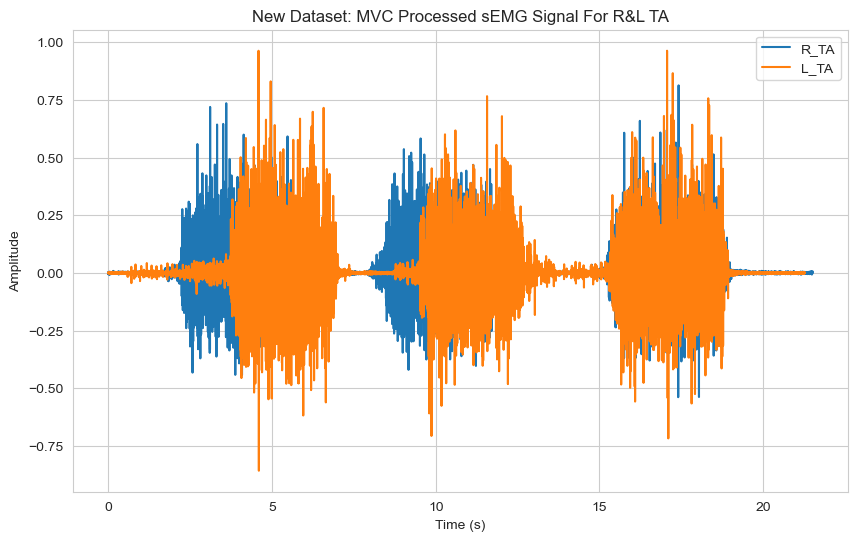

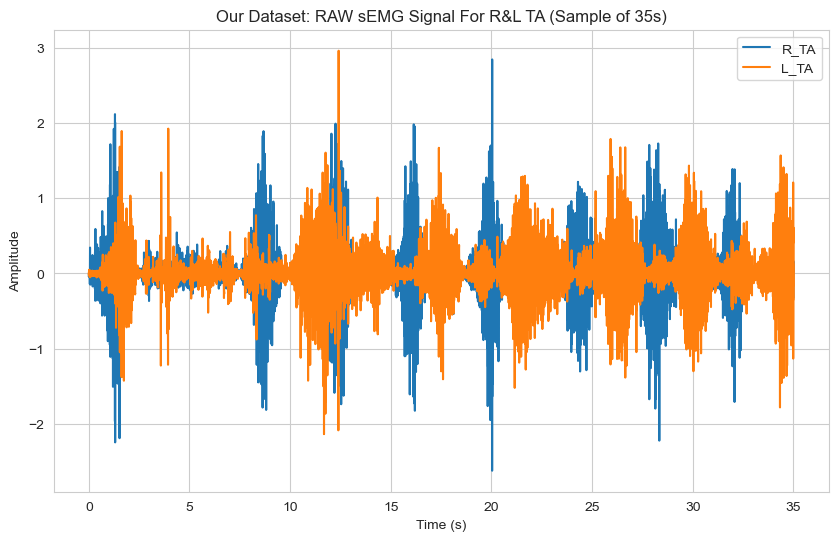

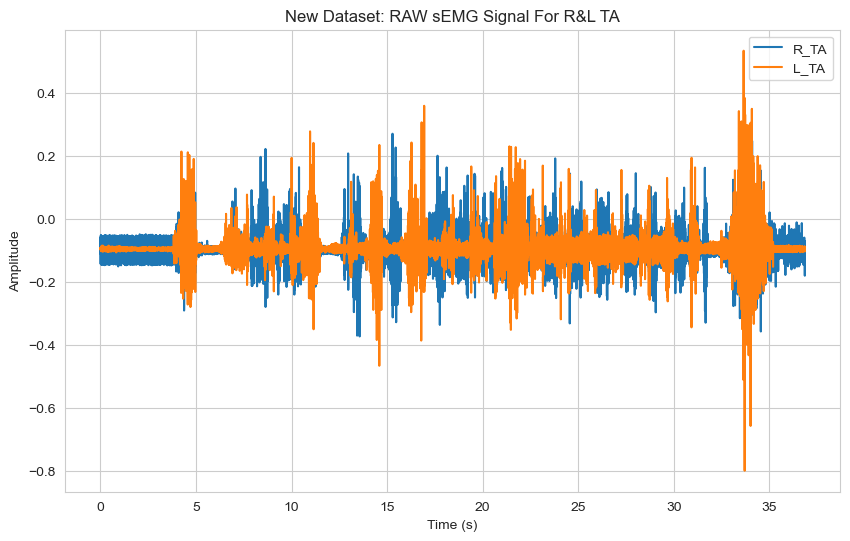

In [3]:
# Plotting MVC Processed sEMG signal for TA (new dataset)
plt.figure(figsize=(10, 6))
plt.title('New Dataset: MVC Processed sEMG Signal For R&L TA')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(df_new_MVC.index/1000, df_new_MVC['RTA'], label='R_TA')
plt.plot(df_new_MVC.index/1000, df_new_MVC['LTA'], label='L_TA')
plt.legend()
# plt.show()

# Plotting RAW sEMG signal for TA (our dataset)
plt.figure(figsize=(10, 6))
plt.title('Our Dataset: RAW sEMG Signal For R&L TA (Sample of 35s)') # first 35 seconds only
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.arange(0,35000)/1000, df_old_RAW_right.iloc[:35000][' EMG 7 (1000Hz)'], label='R_TA')
plt.plot(np.arange(0,35000)/1000, df_old_RAW_left.iloc[:35000][' EMG 7 (1000Hz)'], label='L_TA')
plt.legend()
# plt.show()

# Plotting RAW sEMG signal for TA (new dataset)
plt.figure(figsize=(10, 6))
plt.title('New Dataset: RAW sEMG Signal For R&L TA')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_TA'], label='R_TA')
plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_TA'], label='L_TA')
plt.legend()
plt.show()

Theory: 
- Use the MCV dataset? We only have 1 recording containing 3 tries per subject, meaning we have a total of 30 tries.
- Different scale between our recordings and their recording *amplitude wise*!
- Our recordings are about 10 minutes long but theirs are 37s or 26s long depending on the circuit. 
    ==> Fuse their recordings? about 25 minutes per subject ?   

# 2nd Part: Raw Data? 

In [4]:
def drawing_modes():
    modes = ["Sitting", "Level Ground Waking", "Ramp Ascent", "Ramp Descent", "Stair Ascent", "Stair Descent", "Standing"]
    colors=["blue", "black", "yellow", "magenta", "green", "cyan", "red"]
    # Find the indices where the mode changes
    mode_changes = df_new_RAW['Mode'].diff().ne(0)
    # Create a new DataFrame with the start and end indices of each interval
    intervals = pd.DataFrame({
        'Start': df_new_RAW.index[mode_changes].tolist(),
        'End': df_new_RAW.index[mode_changes.shift(-1, fill_value=True)].tolist(),
        'Mode' : df_new_RAW['Mode'][mode_changes]
    })
    legend_labels = {}
    for _, row in intervals.iterrows():
        start_time = row['Start'] / 1000
        end_time = row['End'] / 1000
        mode_index = int(row['Mode'])  # Convert mode to integer index
        label = modes[mode_index]
        if label not in legend_labels:  # Check if label already exists in dictionary
            legend_labels[label] = colors[mode_index]  # Add label and color to dictionary
            plt.axvspan(start_time, end_time, color=colors[mode_index], alpha=0.3, label=label)
        else:
            plt.axvspan(start_time, end_time, color=colors[mode_index], alpha=0.3)
    
    # Generate legend from unique labels and colors dictionary
    plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for label, color in legend_labels.items()], 
               labels=legend_labels.keys())

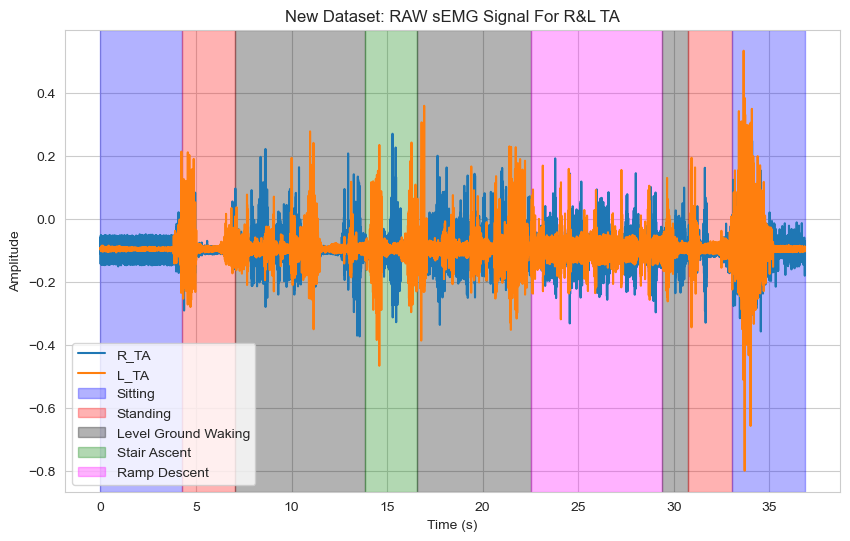

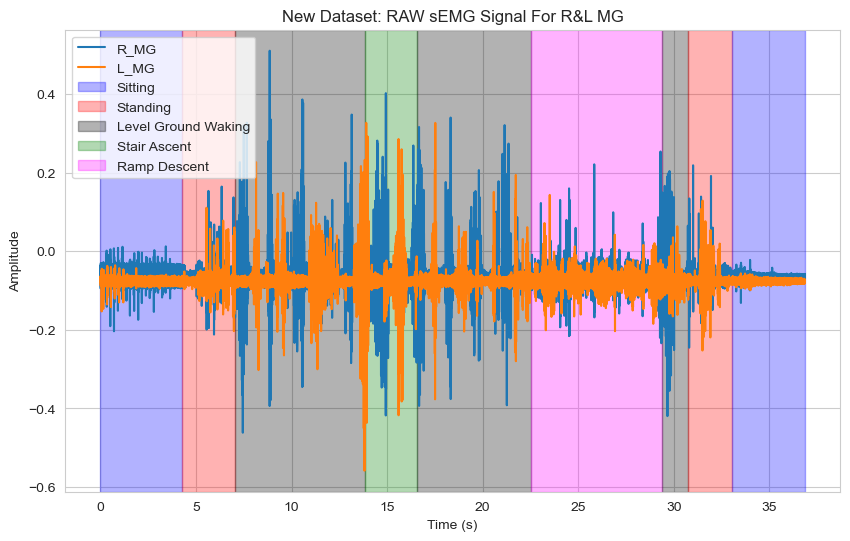

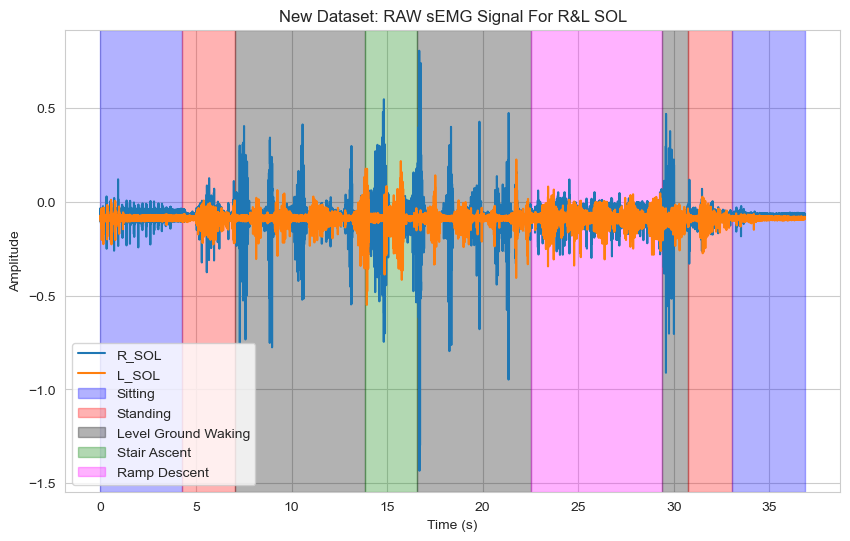

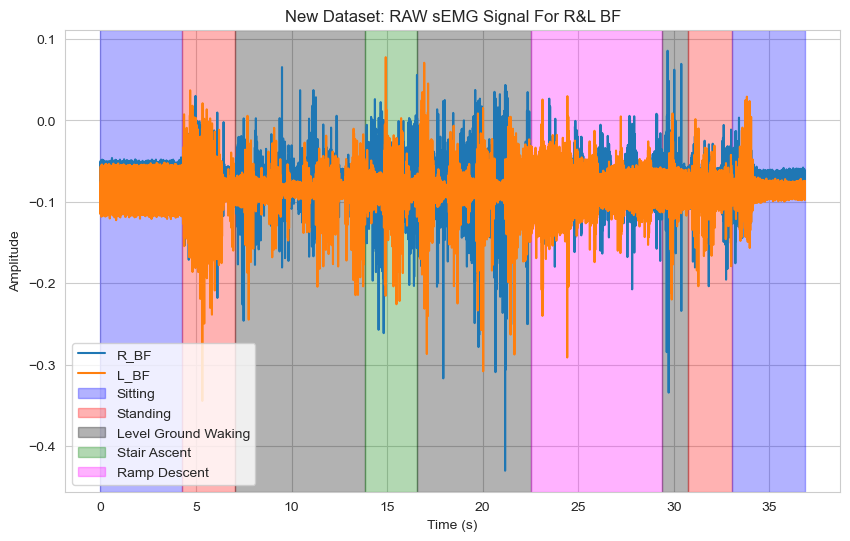

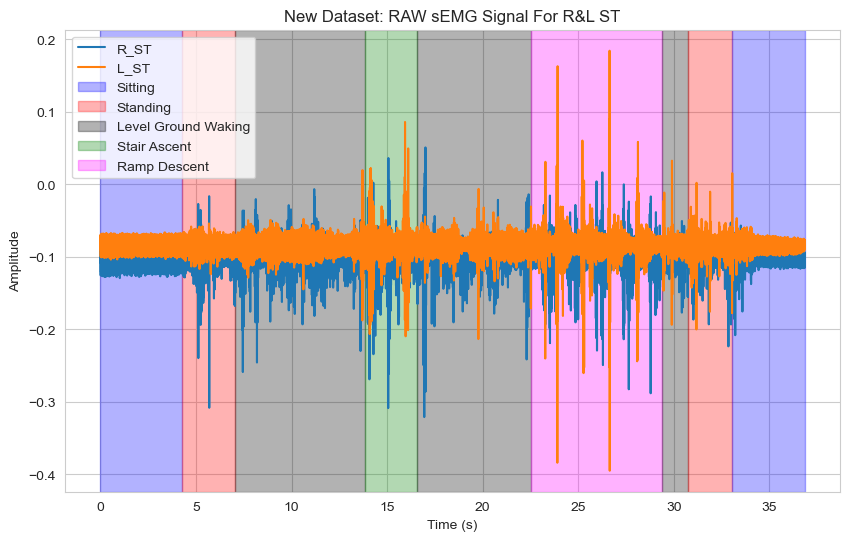

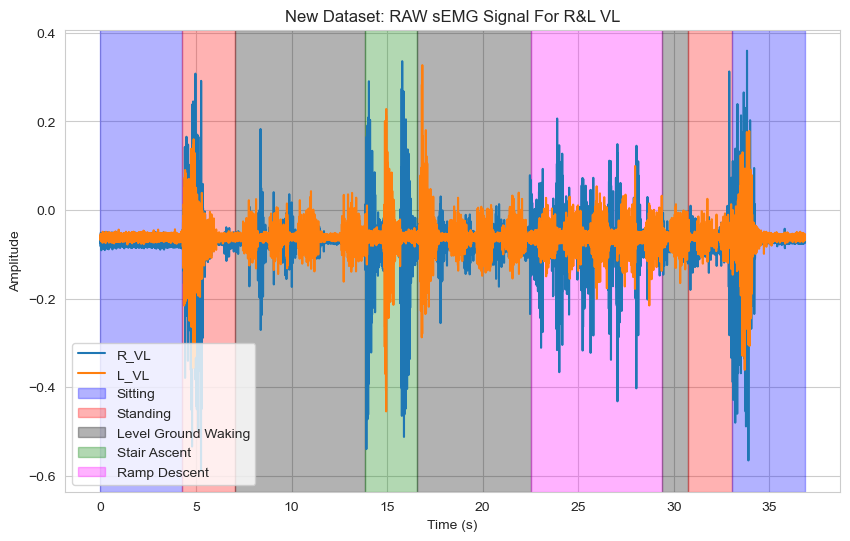

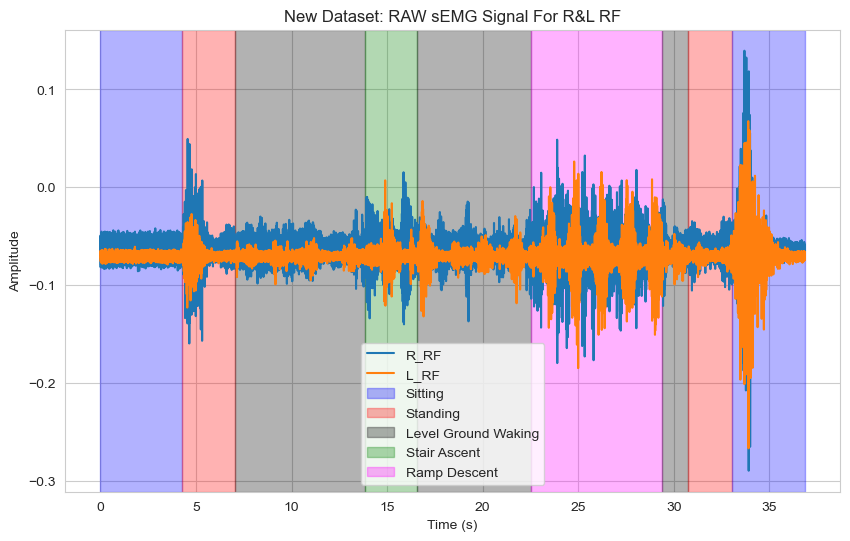

In [5]:
def plot():
    # Plotting RAW sEMG signal for TA (new dataset)
    plt.figure(figsize=(10, 6))
    plt.title('New Dataset: RAW sEMG Signal For R&L TA')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_TA'], label='R_TA')
    plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_TA'], label='L_TA')
    drawing_modes()
    plt.legend()
    # plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.title('New Dataset: RAW sEMG Signal For R&L MG')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_MG'], label='R_MG')
    plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_MG'], label='L_MG')
    drawing_modes()
    plt.legend()
    # plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.title('New Dataset: RAW sEMG Signal For R&L SOL')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_SOL'], label='R_SOL')
    plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_SOL'], label='L_SOL')
    drawing_modes()
    plt.legend()
    # plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.title('New Dataset: RAW sEMG Signal For R&L BF')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_BF'], label='R_BF')
    plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_BF'], label='L_BF')
    drawing_modes()
    plt.legend()
    # plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.title('New Dataset: RAW sEMG Signal For R&L ST')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_ST'], label='R_ST')
    plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_ST'], label='L_ST')
    drawing_modes()
    plt.legend()
    # plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.title('New Dataset: RAW sEMG Signal For R&L VL')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_VL'], label='R_VL')
    plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_VL'], label='L_VL')
    drawing_modes()
    plt.legend()
    # plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.title('New Dataset: RAW sEMG Signal For R&L RF')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_RF'], label='R_RF')
    plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_RF'], label='L_RF')
    drawing_modes()
    plt.legend()
    plt.show()
plot()

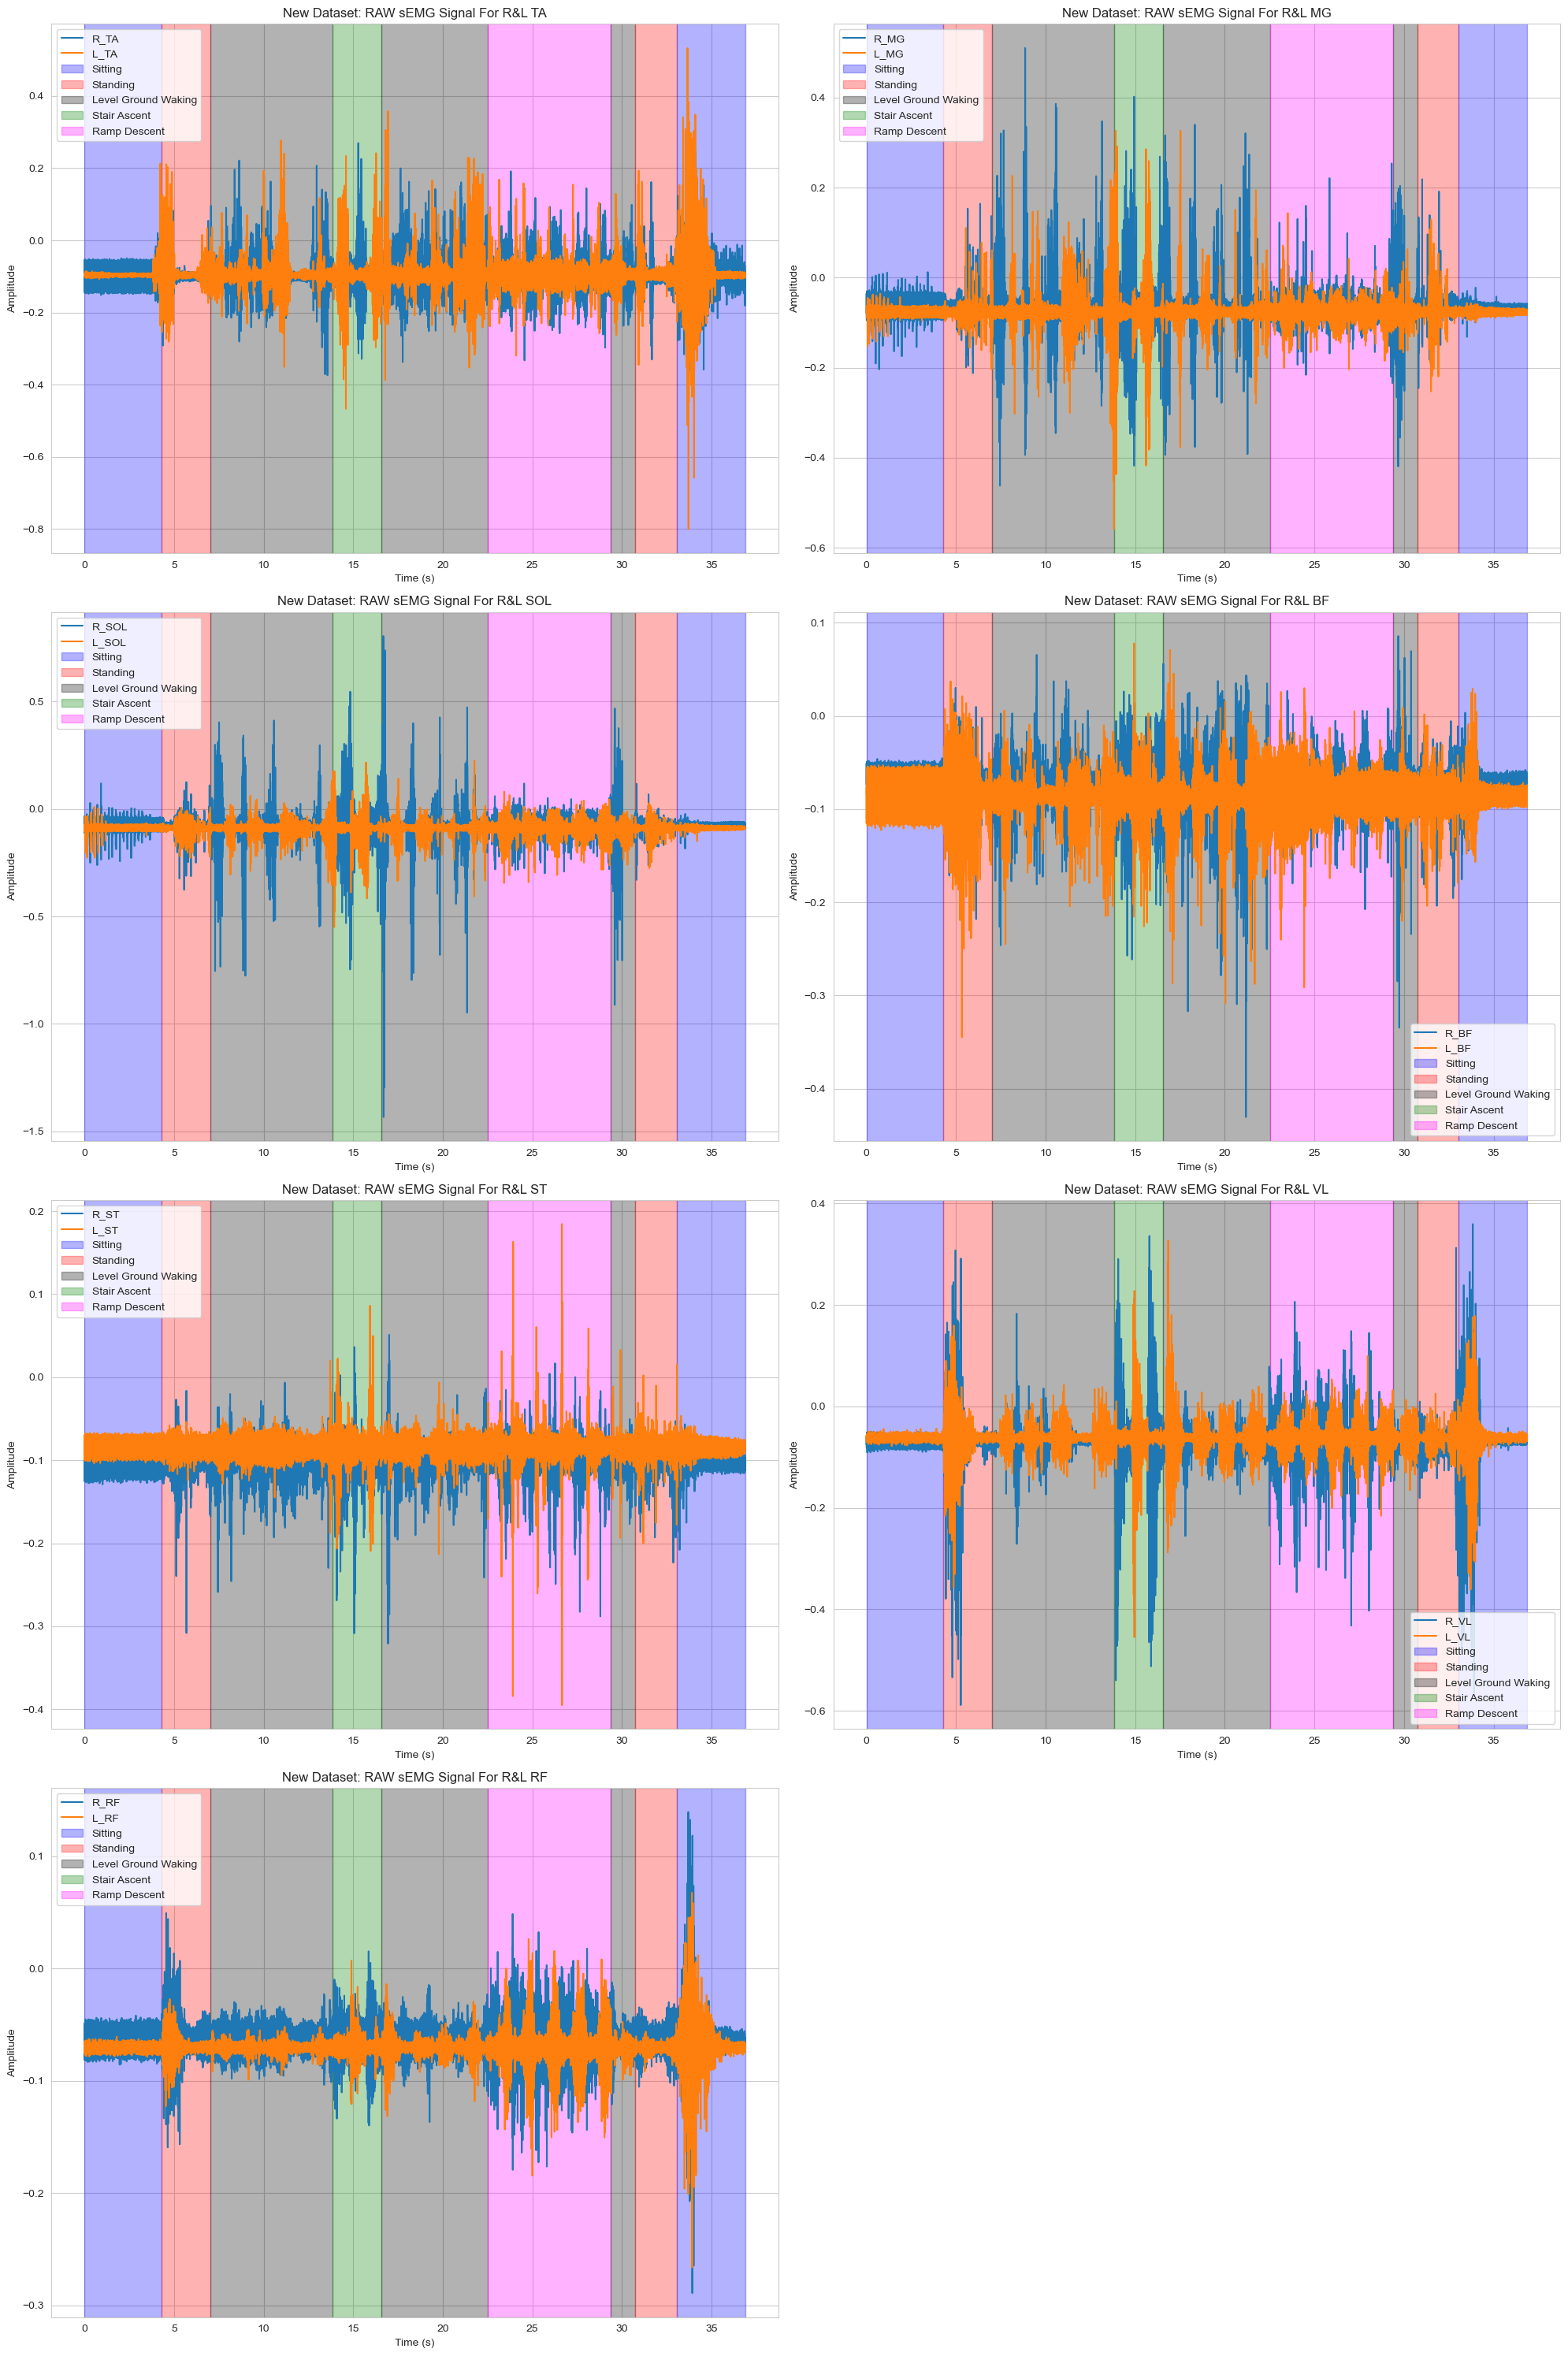

In [6]:
# For Comparison! 
plt.figure(figsize=(20, 30))

for i, muscle in enumerate(['TA', 'MG', 'SOL', 'BF', 'ST', 'VL', 'RF']):
    plt.subplot(4, 2, i+1) 
    plt.title(f'New Dataset: RAW sEMG Signal For R&L {muscle}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.plot(df_new_RAW.index/1000, df_new_RAW[f'Right_{muscle}'], label=f'R_{muscle}')
    plt.plot(df_new_RAW.index/1000, df_new_RAW[f'Left_{muscle}'], label=f'L_{muscle}')
    drawing_modes()
    plt.legend()

plt.tight_layout()  
plt.show()

 Remarks? 
- Use the RAW dataset? we can extract the moment the subject stands up ? (proven to be wrong) 
- Study at which stage (Modes 1 --> 6) of the circuit every muscle is most active and then extract it ? (very difficult and unclear?) 
- Huge spikes ? artifacts ? should be capped to a max value ? 
- different scales and magnitudes of the signals! some signals max at 0.2 and some exceed 1.0!
- is the right-leg left-leg movement useful? needs to be taken into account anyway!



## Circuit 2 maybe ? 

In [7]:
df_new_RAW = pd.read_csv('C:/Users/firas/Downloads/5362627/AB194/AB194/Raw/AB194_Circuit_002_raw.csv')
# Plotting RAW sEMG signal for TA (new dataset)
plt.figure(figsize=(10, 6))
plt.title('New Dataset: RAW sEMG Signal For R&L TA')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_TA'], label='R_TA')
plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_TA'], label='L_TA')
drawing_modes()
plt.legend()
# plt.show()

plt.figure(figsize=(10, 6))
plt.title('New Dataset: RAW sEMG Signal For R&L MG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_MG'], label='R_MG')
plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_MG'], label='L_MG')
drawing_modes()
plt.legend()
# plt.show()

plt.figure(figsize=(10, 6))
plt.title('New Dataset: RAW sEMG Signal For R&L SOL')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_SOL'], label='R_SOL')
plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_SOL'], label='L_SOL')
drawing_modes()
plt.legend()
# plt.show()

plt.figure(figsize=(10, 6))
plt.title('New Dataset: RAW sEMG Signal For R&L BF')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_BF'], label='R_BF')
plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_BF'], label='L_BF')
drawing_modes()
plt.legend()
# plt.show()

plt.figure(figsize=(10, 6))
plt.title('New Dataset: RAW sEMG Signal For R&L ST')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_ST'], label='R_ST')
plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_ST'], label='L_ST')
drawing_modes()
plt.legend()
# plt.show()

plt.figure(figsize=(10, 6))
plt.title('New Dataset: RAW sEMG Signal For R&L VL')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_VL'], label='R_VL')
plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_VL'], label='L_VL')
drawing_modes()
plt.legend()
# plt.show()

plt.figure(figsize=(10, 6))
plt.title('New Dataset: RAW sEMG Signal For R&L RF')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_RF'], label='R_RF')
plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_RF'], label='L_RF')
drawing_modes()
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/firas/Downloads/5362627/AB194/AB194/Raw/AB194_Circuit_002_raw.csv'

contraction by next week 
have the files by the oen after 
by the end of March to run the modelllll for the first time on this data at leasttttttt!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! even just run it 
best in two weekssss !!!!!!!

additional datasets can be added later as improvements 
